In [1059]:
%config IPCompleter.greedy=True

 <a id='TOC'></a>
## Data Storytelling - Table of Contents


#### 1. <a href='#ReadWrangledDataset'>Read wrangled dataset</a>
#### 2. <a href='#ImportPackages'>Import required packages</a>
#### 3. <a href='#defineFunctions'>Define functions</a>
#### 4. <a href='#visualize'>Plot Visualizations</a>

 <a id='ReadWrangledDataset'></a>
 #### Read wrangled dataset
 <a href='#TOC'>Table Of Contents</a>

In [1060]:
# Read the wrangled dataset from another jupyter notebook
%store -r flipkart_df

 <a id='ImportPackages'></a>
 #### Import required packages
 <a href='#TOC'>Table Of Contents</a>

In [1061]:
# Import all required packages for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

 <a id='defineFunctions'></a>
#### Define functions
 <a href='#TOC'>Table Of Contents</a>

In [1062]:
# Extract a list of categories with highest no. of products
def top_categories(num):
    ''' Returns list of given number of categories based on categories order with highest number of products'''
    categories_df=flipkart_df.product_category_tree.value_counts().sort_values(ascending=False).head(num)
    categories = list(categories_df.index)
    return categories_df,categories

In [1063]:
# Extracting dataframes specific to each category from wrangled dataset(flipkart_df)
def get_category_df(list):
    ''' Get dataframes specific to each category '''
    return [flipkart_df[flipkart_df.product_category_tree == i] for i in list]

In [1064]:
# Plot bar graph 
def plot_bar(a,color_list):
    a.plot.bar(x=a.index, y='product_category_tree',color=color_list,alpha=0.7)
    _ = plt.title('Top 10 Product Categories based on the no. of products')
    _ = plt.xlabel('Product Categories')
    _ = plt.ylabel('Category Counts')
    plt.show()

In [1065]:
# Plot histogram of 4 one-dimensional arrays
def plot_histogram(a,b,c,d,name='label name',xlim=1):
    ''' Plot a 4x4 figure with histogram subplots for 4 one-dimensional arrays'''
    fig = plt.figure(figsize=(12,8))

    ax1 = fig.add_subplot(2,2,1)
    ax2 = fig.add_subplot(2,2,2)
    ax3 = fig.add_subplot(2,2,3)
    ax4 = fig.add_subplot(2,2,4)
    
    ax1.hist(a[a.notnull()], bins=5,color='red',density=True)
    ax2.hist(b[b.notnull()], bins=5,color='green',density=True)
    ax3.hist(c[c.notnull()], bins=5,color='coral',density=True)
    ax4.hist(d[d.notnull()], bins=5,color='blue',density=True)
    
    ax1.set_title('Clothing '+name )
    ax1.set_xlim(min(a[a.notnull()]),xlim)
    ax1.set_ylabel('Frequency')
    
    ax2.set_title('Jewellery '+name )
    ax2.set_xlim(min(b[b.notnull()]),xlim)
    ax2.set_ylabel('Frequency')

    ax3.set_title('Footwear '+name )
    ax3.set_xlim(min(c[c.notnull()]),xlim)
    ax3.set_ylabel('Frequency')
    
    ax4.set_title('Mobiles '+name )
    ax4.set_xlim(min(d[d.notnull()]),xlim)
    ax4.set_ylabel('Frequency')
   
    plt.show()

In [1066]:
# Visualize Bee Swarm & Violin plot for top 4 categories (based on number of products for each category)
def plot_swarm_violin(a,b,c,d):
    ''' Plot a 4x4 figure with beeswarm and violin plot subplots for 4 one-dimensional arrays'''
    fig = plt.figure(figsize=(12,10))

    ax1 = fig.add_subplot(2,2,1)
    ax1 = sns.violinplot(a,inner=None)
    ax1 = sns.swarmplot(a,color = 'coral')
    ax1.set_title('Clothing')
    
    ax2 = fig.add_subplot(2,2,2)
    ax2 = sns.violinplot(b,inner=None)
    ax2 = sns.swarmplot(b,color = 'yellow')
    ax2.set_title('Jewellery')

    ax3 = fig.add_subplot(2,2,3)
    ax3 = sns.violinplot(c,inner=None)
    ax3 = sns.swarmplot(c,color = 'lime')
    ax3.set_title('Footwear')
    
    ax4 = fig.add_subplot(2,2,4)
    ax4 = sns.violinplot(d,inner=None)
    ax4 = sns.swarmplot(d, color = 'blue')
    ax4.set_title('Mobiles')

In [1067]:
# Visualize bar plot highest discounted price in each category
def plot_highest_discounted_product(stacked,colors_list):
    # Extract required columns to plot
    viz = flipkart_df[['product_category_tree','retail_price','final_price','discounted_price']]

    # Sort by highest discount price
    viz = viz.sort_values(by=['product_category_tree','discounted_price'],ascending=False)

    # Drop duplicate columns - Retaining only the top discounted product in each product category
    viz.drop_duplicates(subset=['product_category_tree'], keep='first', inplace=True)

    # Sort the filtered dataframe based on highest discount price
    viz.sort_values(by=['discounted_price'],inplace=True,ascending=False)

    # Set product category as the index - to categorize prices for each category
    viz.set_index('product_category_tree',inplace=True)

    # Stacked bar graph comparing the retail, final and discount prices for 
    # highest discounted product from each of the top 10 categories
    _=plt.rcParams["figure.figsize"] = (12,8)

    # visualize stacked bar plot
    viz[:10].plot.bar(stacked=stacked,color=colors_list)

    #label the axes
    plt.title('Top discounted price product from each of the top 10 categories')
    plt.xlabel('Product categories')
    plt.ylabel('Prices')
    plt.show()
    plt.clf()

In [1068]:
# Empirical cummulative distribution function
def ecdf(data):
    ''' Compute ECDF for a one-dimensional array of measurements. '''
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

In [1069]:
# Plot the ecdf
def plot_ecdf(data, color,marker,label_name):
    ''' Plot the ECDF for one-dimensional array '''
    x, y = ecdf(data)
    _ = plt.plot(x, y, marker=marker, color=color,linestyle='none', label=label_name)
    _ = plt.title("Empirical CDF")
    _ = plt.xlabel("Discount price")
    _ = plt.ylabel("ECDF")
    _ = plt.legend()

In [1070]:
# Visualize histogram comparisions for two prices
def hist_compare(df,column1,column2,threshold):
    _ = plt.hist(df[df[column1] < threshold][column1], bins=30, density=True, label='Retail Price')
    _ = plt.hist(df[df[column2] < threshold][column2], bins=30, density=True, alpha=0.4,
                 label='Discounted Price')
    plt.xlabel('Retail Vs Discounted Price for Clothing category')
    plt.ylabel('Frequency')
    plt.title('Price distributions - Clothing')
    plt.legend()
    plt.show()

<a id='visualize'></a>
#### Visualizations
<a href='#TOC'>Table Of Contents</a>

In [1071]:
# Extract category specific datasets
_, category_list = top_categories(4)
clothing_df, jewellery_df, footwear_df, mobiles_df = get_category_df(category_list)

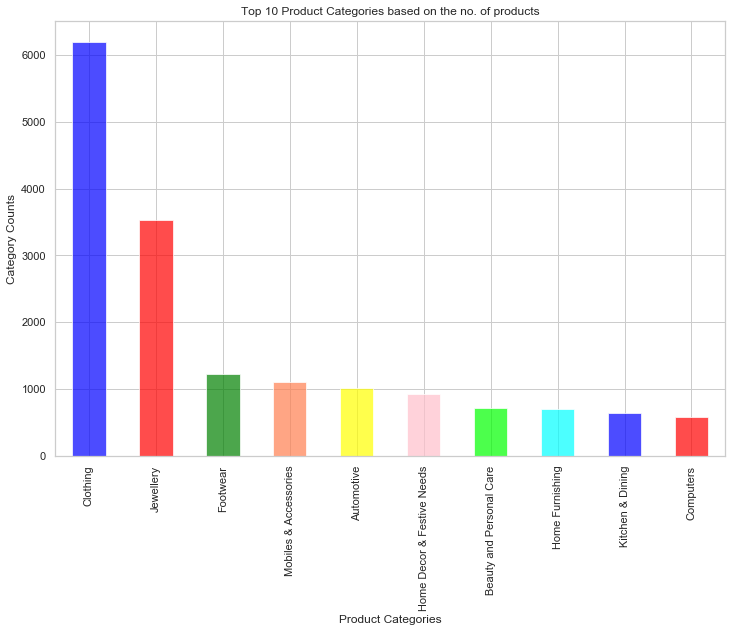

In [1072]:
# Plot bar graph for top 10 categories having highest number of products
df_10, _ = top_categories(10)
plot_bar(df_10, color_list=['blue', 'red', 'green', 'coral', 'yellow', 'pink', 'lime', 'cyan'])

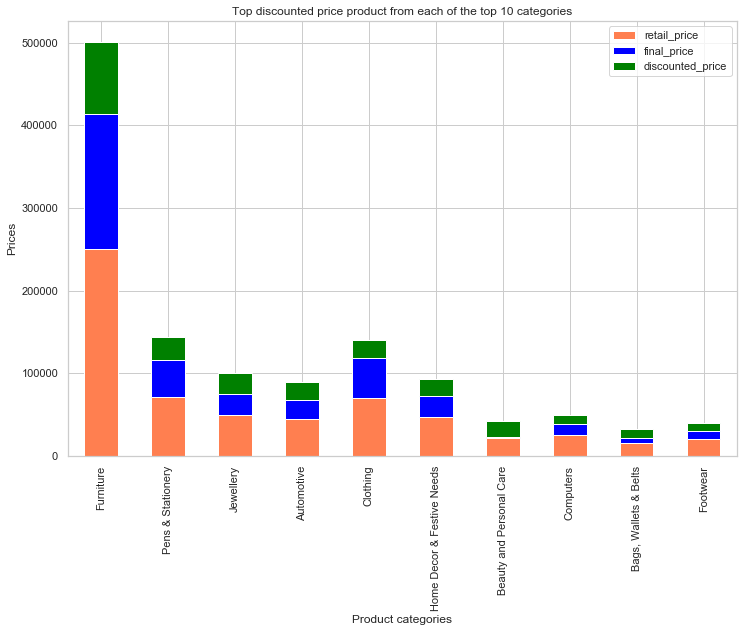

<Figure size 864x576 with 0 Axes>

In [1073]:
# Stacked Bar graph comparing the retail, final and discount prices for top 10 categories
plot_highest_discounted_product(stacked=True,colors_list=['coral','blue','green'])

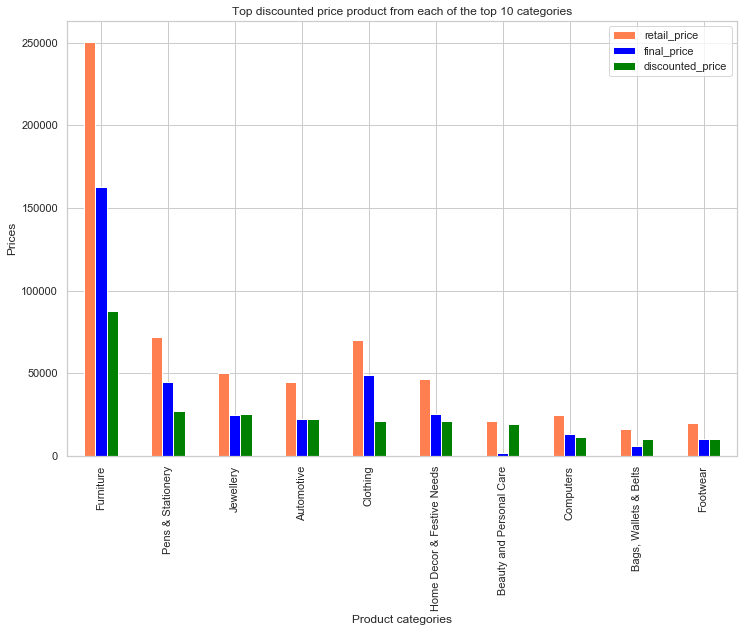

<Figure size 864x576 with 0 Axes>

In [1074]:
# Unstacked Bar graph comparing the retail, final and discount prices for top 10 categories
plot_highest_discounted_product(stacked=False,colors_list=['coral','blue','green'])

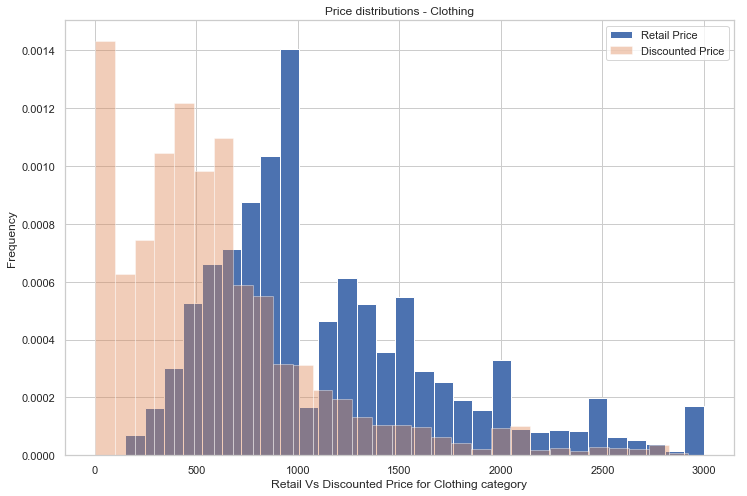

In [1075]:
# Histogram comparision between retail & discount prices for Clothing category
hist_compare(clothing_df,column1='retail_price',column2='discounted_price',threshold=3000)

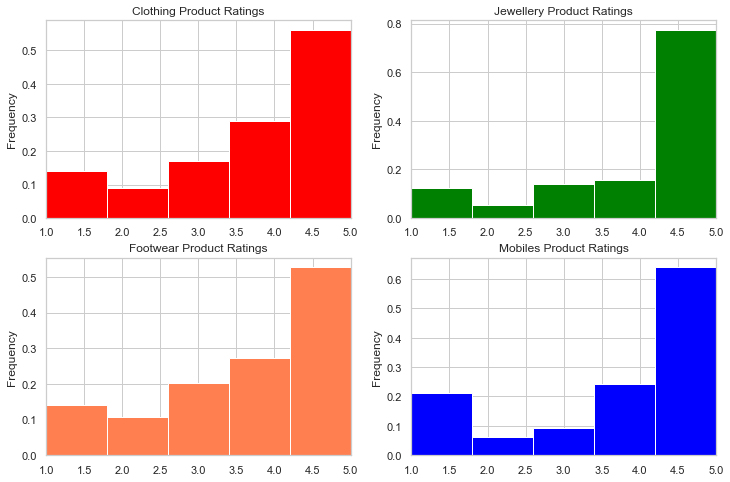

In [1076]:
# Plot histogram of product ratings for top 4 categories 
plot_histogram(clothing_df.product_rating,jewellery_df.product_rating,footwear_df.product_rating,mobiles_df.product_rating,name='Product Ratings',xlim=5)

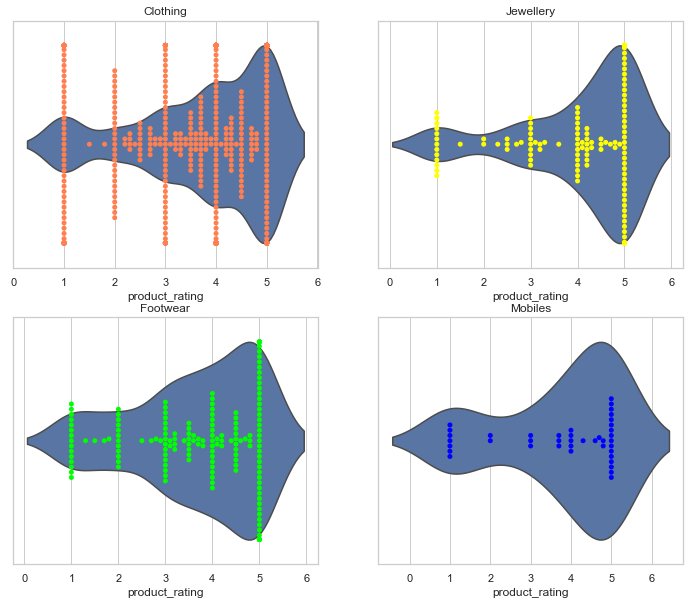

In [1077]:
# Visualize beeswarm & violin plots for product ratings for top 4 categories 
plot_swarm_violin(clothing_df.product_rating,jewellery_df.product_rating,footwear_df.product_rating,mobiles_df.product_rating)

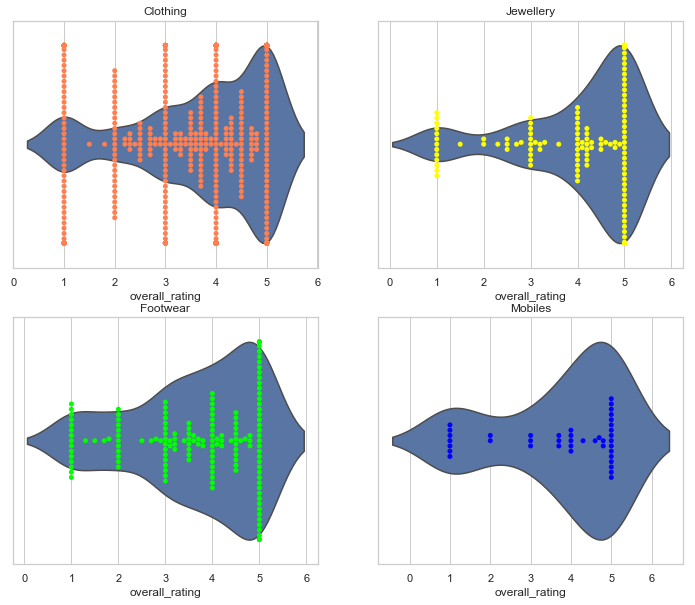

In [1078]:
# Visualize beeswarm & violin plots for overall ratings for top 4 categories 
plot_swarm_violin(clothing_df.overall_rating,jewellery_df.overall_rating,footwear_df.overall_rating,mobiles_df.overall_rating)

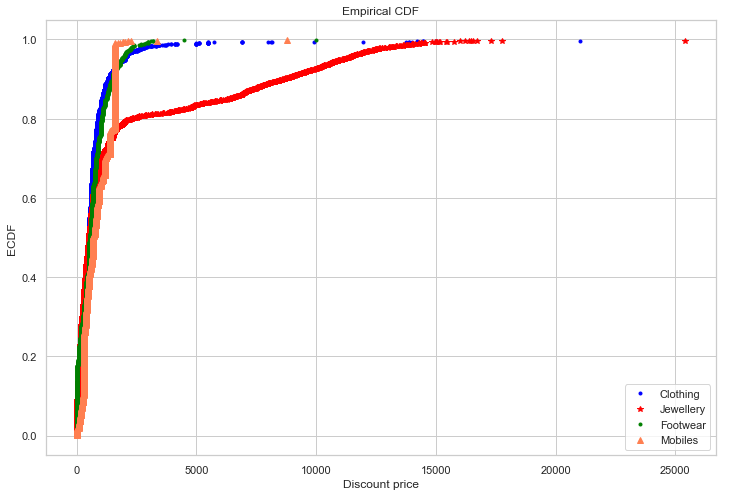

In [1079]:
# ECDF's for top 4 categories based on discount prices
plot_ecdf(clothing_df.discounted_price,color='blue',marker='.',label_name='Clothing')
plot_ecdf(jewellery_df.discounted_price,color='red',marker='*',label_name='Jewellery')
plot_ecdf(footwear_df.discounted_price,color='green',marker='.',label_name='Footwear')
plot_ecdf(mobiles_df.discounted_price,color='coral',marker='^',label_name='Mobiles')